Szenario : 

Du arbeitest als Data Scientist für das Landesamt für Gesundheit und Soziales, die Oberbehörde des Bundeslandes Berlin für das Gesundheits- und Sozialwesen. Im Rahmen der Covid-19-Pandemie, sollen verschiedenen Daten für Bürgerinnen und Bürger visualisiert werden. Die Daten liegen zurzeit noch tabellarisch auf die Webseite vor und müssen von dir geparsed werden. 
(Webseite URL = 'https://www.berlin.de/lageso/gesundheit/infektionskrankheiten/corona/tabelle-indikatoren-gesamtuebersicht/')

Dein Auftrag ist es, dass du

* die Anzahl der Covid 19 Neuinfektionen seit dem ersten Tag
* die kumulierten Fallzahlen für Erkrankte und Genesene
* den Verlauf der relativen Veränderung der 3 Tage Inzidenz 

darstellst. 

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
# read url data

import requests
website_url = 'https://www.berlin.de/lageso/gesundheit/infektionskrankheiten/corona/tabelle-indikatoren-gesamtuebersicht/'

response = requests.get(website_url)
response

<Response [200]>

In [23]:
# parse table data

#response.text.count('<table') #1

from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text)

table = soup.find_all('table')
#table

In [24]:
# save parsed data in df

df = pd.read_html(website_url, attrs={'class': 'result table bordered-table zebra-striped'})

print(df[0].shape)
df[0].head()

(1350, 8)


,Datum,Fallzahl,Neue Fälle,Todesfälle,7-Tage-Inzidenz,relative Veränderung der 7-Tage-Inzidenz,7-Tage-Hospitalisierungs-Inzidenz,ITS-Belegung
0,07.11.2023,NaN,NaN,NaN,255.0,NaN,NaN,NaN
1,06.11.2023,1447637.0,1004.0,5926.0,282.0,350.0,NaN,48.0
2,05.11.2023,1446633.0,NaN,5895.0,286.0,441.0,132.0,51.0
3,04.11.2023,1446633.0,NaN,5895.0,286.0,516.0,132.0,50.0
4,03.11.2023,1446633.0,NaN,5895.0,280.0,574.0,130.0,49.0


In [25]:
# statistical summary

df = df[0]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Fallzahl,1214.0,618089.667216,587521.304217,332.0,109830.5,244248.5,1328744.00,1447637.0
Neue Fälle,1021.0,1324.625857,2305.813094,-161.0,104.0,469.0,1484.00,17566.0
Todesfälle,1209.0,3425.687345,1988.811999,1.0,1833.0,3773.0,4952.00,5926.0
7-Tage-Inzidenz,1349.0,2043.398814,3239.994962,16.0,137.0,781.0,2402.00,19931.0
relative Veränderung der 7-Tage-Inzidenz,1347.0,53.683742,343.040687,-496.0,-175.0,13.0,200.50,2990.0
7-Tage-Hospitalisierungs-Inzidenz,1268.0,83.223186,68.921766,0.0,21.0,75.0,124.00,354.0
ITS-Belegung,1344.0,94.223214,88.049616,1.0,32.0,62.0,131.25,388.0


In [26]:
# check to datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 8 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Datum                                     1349 non-null   object 
 1   Fallzahl                                  1214 non-null   float64
 2   Neue Fälle                                1021 non-null   float64
 3   Todesfälle                                1209 non-null   float64
 4   7-Tage-Inzidenz                           1349 non-null   float64
 5   relative Veränderung der 7-Tage-Inzidenz  1347 non-null   float64
 6   7-Tage-Hospitalisierungs-Inzidenz         1268 non-null   float64
 7   ITS-Belegung                              1344 non-null   float64
dtypes: float64(7), object(1)
memory usage: 84.5+ KB


In [27]:
# missing or incorrect values

df.isna().sum()

Datum                                         1
Fallzahl                                    136
Neue Fälle                                  329
Todesfälle                                  141
7-Tage-Inzidenz                               1
relative Veränderung der 7-Tage-Inzidenz      3
7-Tage-Hospitalisierungs-Inzidenz            82
ITS-Belegung                                  6
dtype: int64

In [28]:
# reorder data/ sort data chronologically

df['Datum'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')
df = df.sort_values(by='Datum',na_position='last')

df_reset = df.reset_index(drop=True)

df.head()
df_reset.head()

,Datum,Fallzahl,Neue Fälle,Todesfälle,7-Tage-Inzidenz,relative Veränderung der 7-Tage-Inzidenz,7-Tage-Hospitalisierungs-Inzidenz,ITS-Belegung
0,2020-03-16,332.0,332.0,NaN,70.0,NaN,NaN,NaN
1,2020-03-17,383.0,51.0,NaN,81.0,2677.0,NaN,NaN
2,2020-03-18,519.0,136.0,NaN,97.0,2461.0,NaN,NaN
3,2020-03-19,688.0,169.0,NaN,125.0,2625.0,NaN,NaN
4,2020-03-20,868.0,180.0,1.0,162.0,2948.0,NaN,33.0


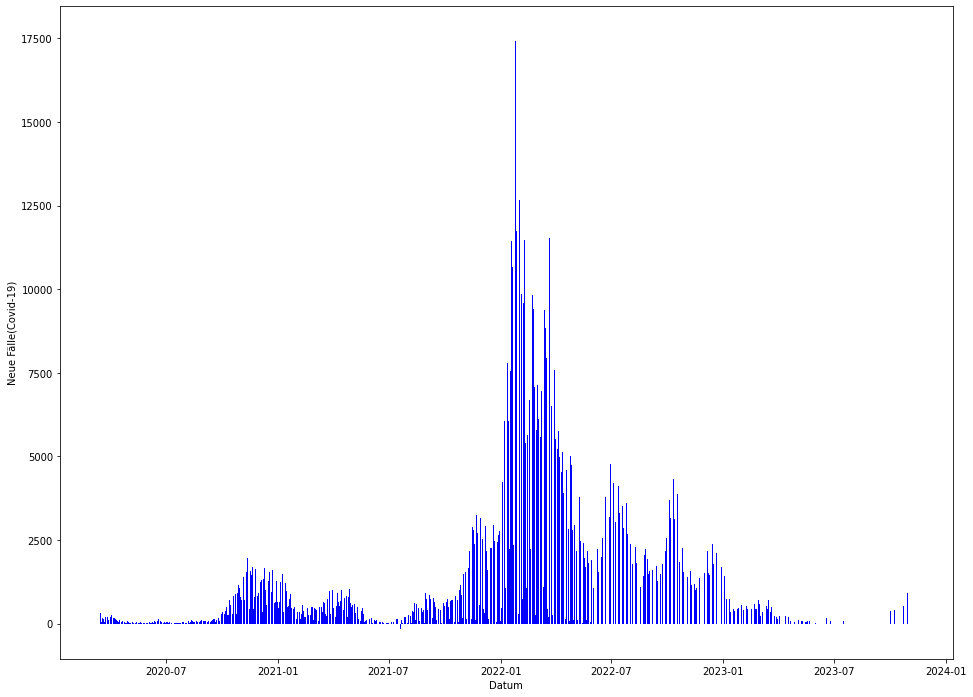

In [29]:
# plot new infections as bar chart

x = df_reset['Datum']
y = df_reset['Neue Fälle']

fig, ax = plt.subplots(figsize=(16, 12))

ax.bar(x, y, color='blue')
ax.set_xlabel('Datum')
ax.set_ylabel('Neue Fälle(Covid-19)')
ax.set_title('')

plt.show()

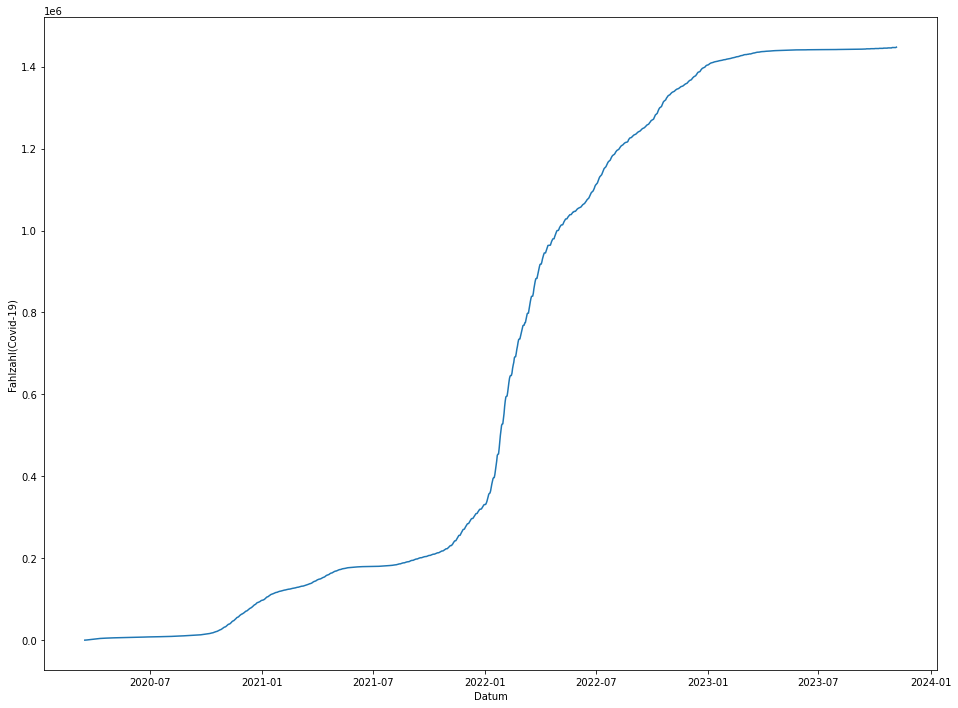

In [30]:
# plot cumulated infections and recoveries as line charts

x = df_reset['Datum']
y = df_reset['Fallzahl']

fig, ax = plt.subplots(figsize=(16, 12))
sns.lineplot(x=x, y=y)

ax.set_xlabel('Datum')
ax.set_ylabel('Fahlzahl(Covid-19)')
ax.set_title('')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


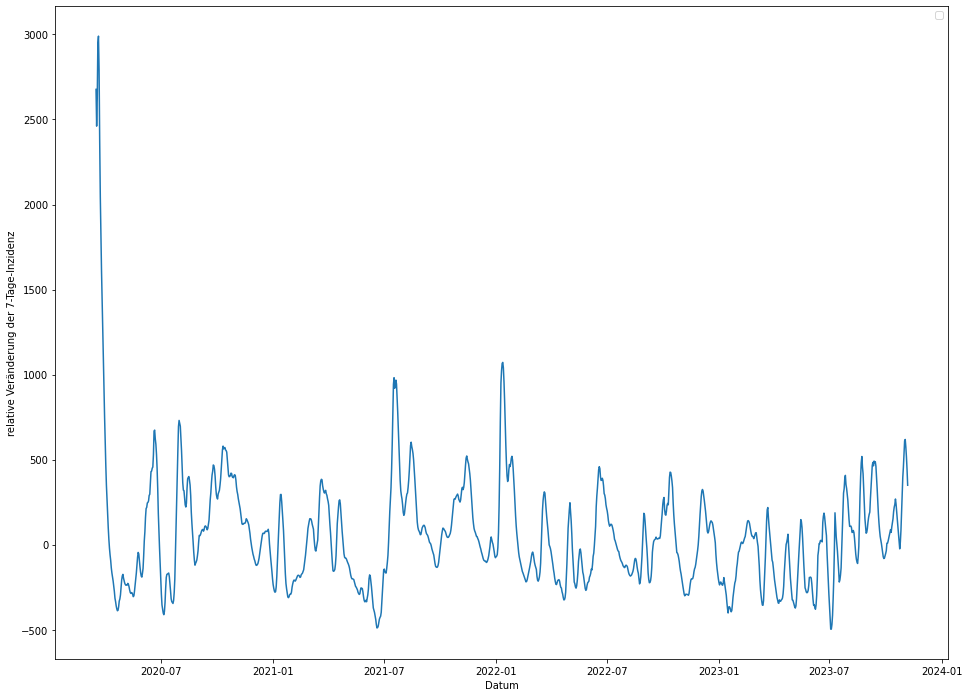

In [31]:
# plot cumulated 7-day incidence as line plot

fig, ax = plt.subplots(figsize=(16, 12))
sns.lineplot(x=df['Datum'], y=df['relative Veränderung der 7-Tage-Inzidenz'], ax=ax, label='')


ax.set_xlabel('Datum')
ax.set_ylabel('relative Veränderung der 7-Tage-Inzidenz')

ax.legend()
plt.show()